In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing()


X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)
])

In [7]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 176537982949447574531617062912.0000 - val_loss: 11062216534508099862528.0000
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 769952984481304412160.0000 - val_loss: 4720339246383104.0000
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 328545201029120.0000 - val_loss: 2014203776.0000
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 140193024.0000 - val_loss: 859.2858
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 61.1209 - val_loss: 1.3406
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3454 - val_loss: 1.3431
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3455 - val_loss: 1.3406
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3457 - val_loss: 1.3408
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3452

In [9]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances 
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 151ms/step


In [10]:
y_pred

array([[2.074965],
       [2.074965],
       [2.074965]], dtype=float32)

In [14]:
y_test[:3]

array([1.918, 1.563, 0.543])

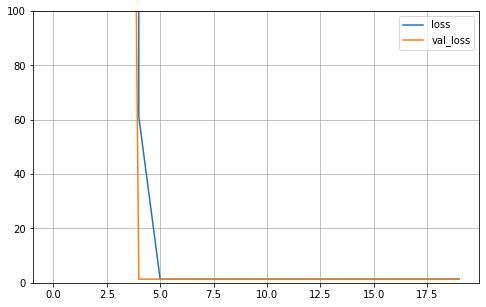

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 100) # set the vertical range to [0-1] 
plt.show()